<div style="text-align: center; font-size: 30px; font-weight: bold;">
    Assignment/Lab 2: Winter 2025 Group 2
    <br>***
</div>

<h1>Team members</h1>
<b>
    
- Minh Le Nguyen
- Liam Knapp
- Gautam Singh
- Gleb Ignatov

</b>
<br>

---

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Building Linear and Logistic Regression Models from Scratch
</div>

## I. Objectives

<b>
    
- Implement Linear Regression and Logistic Regression from scratch without using machine learning 
libraries.  
- Understand and apply gradient descent for optimizing model parameters. 
- Evaluate model performance using appropriate performance measures. 
- Use  your  implementation  to  perform  regression  and classification  on  the  datasets  provided  in  
separate files. 
- Compare your custom implementations with scikit-learn’s built-in models. 
- Reflect on challenges encountered and key takeaways from implementing regression models 
manually.
    
</b>

**Note: Intructions Details at the bottoms**

### *Formulas

<b>

1. [Linear Regression](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#linear-models)

2. [Logistic Regression](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#linear-models)

</b>

---

## II. Implementation

### Set up your Python development environment

In [1]:
%pip install numpy pandas scipy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

### Step 5: Implement the Logistic Regression Algorithm

In [3]:
class LogisticRegressionScratch:
    """
    Linear Regression Class that Implements the Algorithm for Regression Tasks.
    
    This class supports training on input features and corresponding target values, 
    and predicting target values for new input data.

    Methods:
        __init__():
            Initializes the attributes: learning rate (lr), iterations, weights, bias

        _sigmoid(z):
            Returns the product of the sigmoid function
        
        fit(x, y):
            Trains the logistic regressor using the provided input features (x) and target values (y).
            Applies the gradient descent algortihm and Binary-Cross Entropy.
        
        predict_probabilities(X):
            Returns the probability scores for each class (feature)
            Returns the probabilities as a numpy array
        
        predict(x, threshold):
            Predicts class labels for a given set of input features (x)
            Returns the predictions as a numpy array
        
        get_params():
            Returns the weights as a numpy array and bias
    """
    def __init__(self, lr=0.01, iterations=1000):
        """Initialize attributes"""
        self.lr = lr
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        """Returns the product of the sigmoid function"""
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y): #Train using Gradient Descent
        """Trains the logistic regressor by applying gradiesnt descent algorithm and binary-cross entropy function"""
        X = np.array(X, dtype=float) #Features of the shape (n_samples, n_features)
        y = np.array(y, dtype=float) #Binary target of the shape (n_samples,)
        
        # If X is 1D, reshape to (n_samples, 1)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        # Gradient Descent
        for _ in range(self.iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Predictions (sigmoid)
            y_pred = self._sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias    -= self.lr * db

    def predict_probabilities(self, X):       
        """Returns the probability scores for ach class (feature)"""
        X = np.array(X, dtype=float)

        if X.ndim == 1:
            X = X.reshape(-1, 1)

        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Predict class labels for a given set of examples"""
        probabilities = self.predict_probabilities(X) #Predict probabilities using the sigmoid function
        return np.where(probabilities >= threshold, 1, 0)
    
    def get_params(self):
        """Returns the weights as a numpy array and bias"""
        return self.weights, self.bias # Return the weights and bias


### Step 6: Load the Dataset 
(training_dataset_logistic.csv and validation_dataset_logistic.csv)    

In [4]:
# Adjust these paths if your CSV files are stored elsewhere
train_logistic_path = "dataset/training_dataset_logistic.csv"
valid_logistic_path = "dataset/validation_dataset_logistic.csv"

# Load training dataset
train_data_log = pd.read_csv(train_logistic_path)
# Load validation dataset
valid_data_log = pd.read_csv(valid_logistic_path)

print("Training Data (head):")
display(train_data_log.head())

print("\nValidation Data (head):")
display(valid_data_log.head())

print("\nTraining Data Info:")
print(train_data_log.info())

print("\nValidation Data Info:")
print(valid_data_log.info())

# Optional: check for missing values, duplicates, do basic stats, outliers, etc.
print("\nMissing values (Train):\n", train_data_log.isnull().sum())
print("\nMissing values (Validation):\n", valid_data_log.isnull().sum())


# Since your CSV has columns: x1, x2, and y (instead of "target"), do the following:
X_train = train_data_log.drop(columns=["y"]).values  # drop the 'y' column for features
y_train = train_data_log["y"].values                 # this is the target

X_valid = valid_data_log.drop(columns=["y"]).values
y_valid = valid_data_log["y"].values

print("\nShape of Training Features:", X_train.shape)
print("Shape of Training Target:", y_train.shape)
print("Shape of Validation Features:", X_valid.shape)
print("Shape of Validation Target:", y_valid.shape)


Training Data (head):


,x1,x2,y
0,-1.595,-0.741,0
1,-1.106,0.949,0
2,0.803,-1.045,1
3,1.502,2.541,1
4,-0.644,0.483,0



Validation Data (head):


,x1,x2,y
0,0.087,0.200,0
1,-2.423,-0.218,0
2,1.079,-0.826,1
3,1.819,-1.100,1
4,0.993,-1.037,1



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      160 non-null    float64
 1   x2      160 non-null    float64
 2   y       160 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.9 KB
None

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40 non-null     float64
 1   x2      40 non-null     float64
 2   y       40 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.1 KB
None

Missing values (Train):
 x1    0
x2    0
y     0
dtype: int64

Missing values (Validation):
 x1    0
x2    0
y     0
dtype: int64

Shape of Training Features: (160, 2)
Shape of Training Target: (160,)
Shape of Validation Features: (40, 2)
Shape of Validation Target: (4

### Step 7: Train the Logistic Regression Model

In [5]:
# 1) Create an instance of the custom logistic regression model
lr_model = LogisticRegressionScratch(lr=0.01, iterations=1000)

# 2) Train (fit) the model on your training data
lr_model.fit(X_train, y_train)

### Step 8: Test and Evaluate the Model

Evaluation on Validation Set
Accuracy : 0.85
Precision: 0.8
Recall   : 0.9524
F1-score : 0.8696

Plotting decision boundary (2D data)


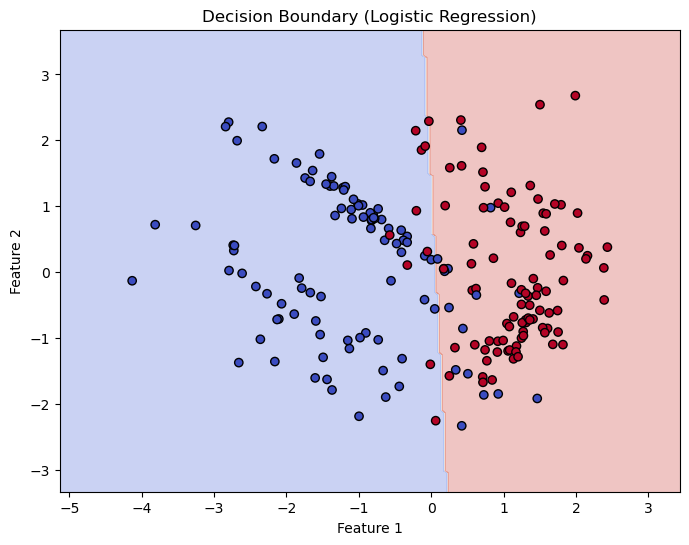

In [6]:
# 1) Use the trained lr_model to make predictions on the validation set
y_pred = lr_model.predict(X_valid, threshold=0.5)

# 2) Compute accuracy, precision, recall, F1-score
acc = accuracy_score(y_valid, y_pred)
prec = precision_score(y_valid, y_pred)
rec = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Evaluation on Validation Set")
print("Accuracy :", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1-score :", round(f1, 4))

# 3) If 2 features (X_valid.shape[1] == 2)
if X_valid.shape[1] == 2:
    print("\nPlotting decision boundary (2D data)")
    
    # Combine train + valid or just use valid for plotting. Here we combine for demonstration:
    combined_X = np.vstack((X_train, X_valid))
    combined_y = np.concatenate((y_train, y_valid))
    
    x_min, x_max = combined_X[:, 0].min() - 1, combined_X[:, 0].max() + 1
    y_min, y_max = combined_X[:, 1].min() - 1, combined_X[:, 1].max() + 1
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Flatten and combine into a shape => (n_points, 2)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    # Predict on the entire grid
    grid_preds = lr_model.predict(grid_points)
    grid_preds = grid_preds.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, grid_preds, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(combined_X[:, 0], combined_X[:, 1], c=combined_y, 
                cmap=plt.cm.coolwarm, edgecolor="k")
    plt.title("Decision Boundary (Logistic Regression)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

## 4. Equation of the Decision Boundary

For a **two-feature** logistic regression model with weights \(w_1, w_2\) and bias \(b\), the 
decision boundary occurs where the model’s output probability is exactly **0.5**. 
Mathematically:
$$
\sigma(w_1 x_1 + w_2 x_2 + b) \;=\; 0.5 
\;\;\;\Longleftrightarrow\;\;\;
w_1 x_1 \;+\; w_2 x_2 \;+\; b \;=\; 0.
$$
Solving for \(x_2\):
$$
x_2 \;=\; -\,\frac{b \;+\; w_1 x_1}{\,w_2\,}.
$$


In [7]:
# 5) Compare with scikit-learn's LogisticRegression
sklearn_lr = LogisticRegression()
sklearn_lr.fit(X_train, y_train)      # Train scikit-learn model
y_pred_sklearn = sklearn_lr.predict(X_valid)

acc_sk  = accuracy_score(y_valid, y_pred_sklearn)
prec_sk = precision_score(y_valid, y_pred_sklearn)
rec_sk  = recall_score(y_valid, y_pred_sklearn)
f1_sk   = f1_score(y_valid, y_pred_sklearn)

print("\nComparison with Scikit-Learn LogisticRegression")
print("Accuracy  => Scratch:", round(acc,4), "vs Sklearn:", round(acc_sk,4))
print("Precision => Scratch:", round(prec,4), "vs Sklearn:", round(prec_sk,4))
print("Recall    => Scratch:", round(rec,4),  "vs Sklearn:", round(rec_sk,4))
print("F1-score  => Scratch:", round(f1,4),   "vs Sklearn:", round(f1_sk,4))


Comparison with Scikit-Learn LogisticRegression
Accuracy  => Scratch: 0.85 vs Sklearn: 0.875
Precision => Scratch: 0.8 vs Sklearn: 0.8333
Recall    => Scratch: 0.9524 vs Sklearn: 0.9524
F1-score  => Scratch: 0.8696 vs Sklearn: 0.8889


---

## III. Instructions

### Step 1: Implement the Linear Regression Algorithm
Your task is to implement the Linear Regression algorithm from scratch without using any machine 
learning libraries like scikit-learn for the core functionality. Follow these steps:

<b>

1. Create a LinearRegression class with the following methods:
    - fit(X, y): Train the model using the given input features X and target values y.
    - predict(X): Predict the target values for a given set of examples.
    - You may add other methods or modify the input arguments as needed
2. Use the Mean Squared Error (MSE) as the loss function
3. Implement gradient descent to optimize the model parameters. Allow the learning rate (lr) and 
the number of iterations to be adjustable
4. Ensure your implementation supports multiple features.

</b>

---

### Step 2: Load the Dataset 

You will receive files named training_dataset_linear.csv and validation_dataset_linear.csv containing the 
datasets. Perform the follow

<b>

1. Load the data from the provided CSV files.
2. Understand the dataset using visualizations and basic statistical summaries.
3. Preprocess the data if necessary (e.g., handle missing values, normalize features if needed). 

</b>

---

### Step 3: Train the Linear Regression Model         

<b>

1. Initialize your LinearRegression model with a learning rate of lr and iter iterations. 
2. Train the model using the fit method with the provided training dataset.

</b>

---

### Step 4: Test and Evaluate the Model 

<b>

1. Use the predict method to make predictions on the validation dataset.
2. Compute the Mean Squared Error (MSE) and R-squared score to evaluate performance.
3. Plot the regression line generated by the model along with the training data on a single graph.
4. Compare your implementation with the result of LinearRegression from scikit-learn.

</b>

---

### Step 5: Implement the Logistic Regression Algorithm  

<b>

1. Create a LogisticRegression class with the following methods:
    - fit(X, y): Train the model using the given input features X and target values y. 
    - predict(X): Predict the class labels for a given set of examples. 
    - predict_proba(X): Return the probability scores for each class. 
    - You may add other methods or modify the input arguments as needed.

2. Use the Binary Cross-Entropy (Log Loss) as the loss function.
3. Implement gradient descent to optimize the model parameters. Allow the learning rate (lr) and 
the number of iterations to be adjustable.
4. Ensure your implementation supports multiple features.
5. Use the sigmoid function to map predictions to probabilities. 
   
</b>

---

### Step 6: Load the Dataset    

You will receive files named training_dataset_logistic.csv and validation_dataset_logistic.csv containing 
the datasets. Perform the following: 

<b>

1. Load the data from the provided CSV files.
2. Understand the dataset using visualizations and basic statistical summaries.
3. Preprocess the data if necessary (e.g., handle missing values, normalize features if needed). 

</b>

---

### Step 7: Train the Logistic Regression Model        

<b>

1. Initialize your LogisticRegression model with a learning rate of lr and iter iterations.
2. Train the model using the fit method with the provided training dataset.

</b>

---


### Step 8: Test and Evaluate the Model:

<b>

1. Use the predict method to classify examples from the validation dataset.
2. Compute the accuracy, precision, recall, and F1-score to evaluate the model.
3. Plot the decision boundary along with the training data on a single graph.
4. What is the equation of the decision boundary?
5. Compare your implementation with the result of LogisticRegression from scikit-learn.
   
</b>